In [1]:
# Apurva Shah, 705595011, Psych 186B
# Homework 2

# General Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import statistics

In [2]:
seed_value = 40
random.seed(seed_value)

In [3]:
# Utility Functions for Lab

class VectorTools():
    def __init__(self):
        pass

    def generate_vector(self, length):
        # Function to generate a random vector of specified length 
        vector = np.random.randn(length)
        return vector
    
    def normalize_mean(self, vector):
        # Function to take vector and normalize its mean to zero
        mean = np.mean(vector)
        return vector - mean
    
    def normalize_vector(self, vector):
        # Function to normalize a vector to unit length
        norm = np.linalg.norm(vector)
        return vector / norm if norm != 0 else vector
        
    def calculate_length(self, vector):
        # Calculates the length of a vector given a vector
        sum = 0
        for i in vector:
            sum += i**2
        return math.sqrt(sum)
    
    def calculate_dot_product(self, v1, v2):
        # Calculates the dot product between two vectors
        dot_product = 0

        # Vectors are not the same dimension
        if len(v1) != len(v2):
            raise Exception()

        for i in range(0, len(v1)):
            dot_product += v1[i]*v2[i]
        
        return dot_product

vmod = VectorTools()

## Question 1: 

In [4]:
# A: Generate two vectors f, g

length = 100
f = vmod.generate_vector(length)
g = vmod.generate_vector(length)

# B: Set the mean of the vectors to zero

f = vmod.normalize_mean(f)
g = vmod.normalize_mean(g)

# C: Normalize the Vectors
f_normalized = vmod.normalize_vector(f)
g_normalized = vmod.normalize_vector(g)

# D: Computer outer product A
A = np.outer(g_normalized, f_normalized)

# E: Show Af gives output g' which is the same direction as g...
Af = np.dot(A, f_normalized)
g_prime = Af/np.linalg.norm(Af)
g_dot = np.dot(g_normalized, g_prime)

cosine_similarity = round(g_dot / (np.linalg.norm(g_normalized) * np.linalg.norm(g_prime)), 2)
g_length = round(np.linalg.norm(g_prime), 2)

print("The cosine similarity for the two vectors are: ", cosine_similarity)
print("The length of g' is: ", g_length)

The cosine similarity for the two vectors are:  1.0
The length of g' is:  1.0


## Question 2:

In [5]:
# A: Generate new normalized vector f'
f_prime = vmod.generate_vector(length)
f_prime_normalized = vmod.normalize_vector(f_prime)

# B: Check to see if it is more or less orthogonal to f by looking at the cosine of the angle between f and f'.
fdotprods = np.dot(f_normalized, f_prime_normalized)
cosine_f_fprime = round(fdotprods / (np.linalg.norm(f_normalized) * np.linalg.norm(f_prime_normalized)), 2)
print("The cosine similarity for the two vectors are: ", cosine_f_fprime)

# C: Compute Af' and look at the length of this vector.

Af_prime = np.dot(A ,f_prime_normalized)
Af_length = round(np.linalg.norm(Af_prime), 2)
print("The length of Af' is: ", Af_length)

The cosine similarity for the two vectors are:  -0.14
The length of Af' is:  0.14


One thing that I noticed is that when producing the cosine of F' and the length of Af', the results are often the same. I was expecting Af' to be close to zero since I was expecting f to be closely orthogonal to f'. In terms of the cosine, when we are computing Af where A is the outer product of g and f and then use that with calculation to f', the vectors length will be the cosine of the angle between f and f'. 

## Question 3:

In [6]:

def generate_vector_pairs(num_pairs, vector_length):
    # Generate many pairs of normalized random vectors
    pairs = []
    for i in range(num_pairs):
        fi = vmod.generate_vector(vector_length)
        gi = vmod.generate_vector(vector_length)
        fi_normalized = vmod.normalize_vector(fi)
        gi_normalized = vmod.normalize_vector(gi)
        pairs.append((fi_normalized, gi_normalized))
    return pairs

def compute_individual_outer_product_matrices(vector_pairs):
    outer_product_matrices = []
    for fi, gi in vector_pairs:
        Ai = np.outer(gi, fi)
        outer_product_matrices.append(Ai)
    return outer_product_matrices

def compute_connectivity_matrix(vector_pairs):
    # Compute the overall connectivity matrix A from vector pairs
    A = np.zeros((len(vector_pairs[0][0]), len(vector_pairs[0][0])))
    for fi, gi in vector_pairs:
        Ai = np.outer(gi, fi)
        A += Ai
        # Transposing Matrix
        transposed = np.transpose(A)
    return A

# A: Generate many pairs of normalized random vectors fi, and gi
vector_pairs = generate_vector_pairs(50, 100)

# B: Compute outer product matrices.
outer_product_matrices = compute_individual_outer_product_matrices(vector_pairs)

# C: Form overall connectivity matrix. 

# I am not using the outerproduct matrix because its a bit tedious to edit that code to add in the connectivity stuff. Better to 
# modularize it separately. 
A = compute_connectivity_matrix(vector_pairs)

print("Connectivity Matrix:", A)

Connectivity Matrix: [[-0.17503674 -0.05531485  0.0661444  ...  0.12050525  0.08685329
  -0.04373826]
 [-0.01190671  0.02837364 -0.06596101 ... -0.07184675 -0.02510767
  -0.06812661]
 [ 0.03227419  0.08460816  0.061847   ... -0.06944226  0.06529323
  -0.05643663]
 ...
 [-0.00934582  0.07112867  0.06584439 ...  0.00570672  0.05640397
   0.0614219 ]
 [-0.04398446  0.01624041 -0.0625563  ...  0.0814023  -0.17292838
  -0.05488037]
 [-0.00408658 -0.08665499 -0.00851783 ... -0.04323837 -0.15405364
  -0.00508223]]


In [7]:
# D Test the resulting matrix A from above as follows:
def test_connectivity_matrix_with_averages(A, vector_pairs, num_test_vectors):
    total_cosine_similarity = 0
    total_length_g_prime = 0
    results = []

    # Test with stored vectors (3D1, 3D2, 3D3)
    for fi, gi in vector_pairs:
        # 3D1: Compute the actual/observed output g' for each stored input fi using A
        g_prime = np.dot(A, fi)
        
        # 3D2: Compare it with gi by computing the cosine between gi and g'
        cosine_similarity = np.dot(gi, g_prime) / (np.linalg.norm(gi) * np.linalg.norm(g_prime))

        # 3D3: Compute the length of the output vector g'
        length_g_prime = np.linalg.norm(g_prime)

        # Accumulate the cosine similarity and length of g'
        total_cosine_similarity += cosine_similarity
        total_length_g_prime += length_g_prime
        results.append((cosine_similarity, length_g_prime))

    # Averages for printing
    avg_cosine_similarity = total_cosine_similarity / len(vector_pairs)
    avg_length_g_prime = total_length_g_prime / len(vector_pairs)

# 3D4: Generate new test vectors and test selectivity
    test_vector_lengths = []
    for _ in range(num_test_vectors):
        hi = vmod.normalize_vector(vmod.generate_vector(len(A)))
        hi_prime = np.dot(A, hi)
        test_vector_lengths.append(np.linalg.norm(hi_prime))

    # Returning average length of hi' and the average cosine similarity and length of g'
    return results, avg_cosine_similarity, avg_length_g_prime, np.mean(test_vector_lengths)

# Run the test with averages
test_results, avg_cosine_similarity, avg_length_g_prime, average_length_hi_prime = test_connectivity_matrix_with_averages(A, vector_pairs, 50)

# Printing the averages
print("Average Cosine Similarity:", round(avg_cosine_similarity, 4))
print(f"Average Length of g':", round(avg_length_g_prime, 4))
print(f"Average Length of hi':", round(average_length_hi_prime, 4))

Average Cosine Similarity: 0.823
Average Length of g': 1.2193
Average Length of hi': 0.6941


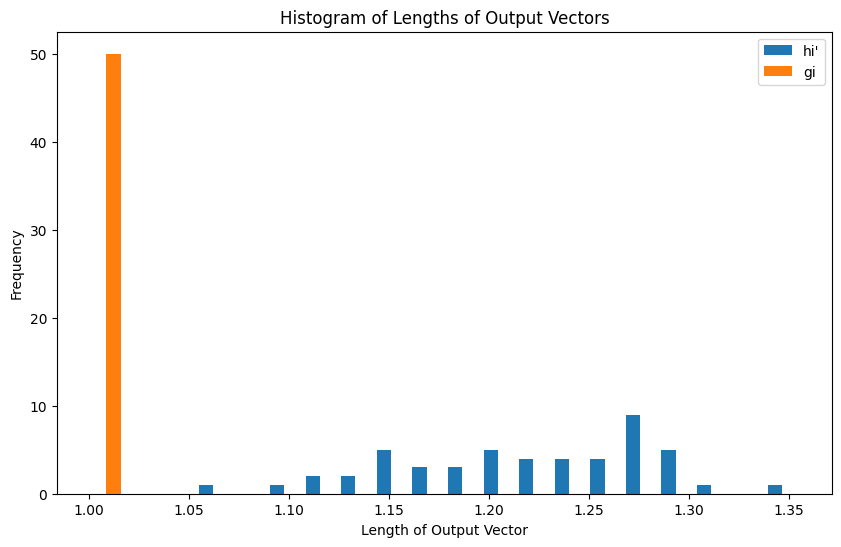

In [8]:
# Extra Graphing
length_gi = 1 # 1 because normalized
lengths_hi_prime = [length for _, length in test_results]
lengths_data = lengths_hi_prime + [length_gi] * len(lengths_hi_prime)

# Labels
labels = ['hi\''] * len(lengths_hi_prime) + ['gi'] * len(lengths_hi_prime)

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.hist([lengths_hi_prime, [length_gi] * len(lengths_hi_prime)], bins=20, label=['hi\'', 'gi'])
plt.xlabel('Length of Output Vector')
plt.ylabel('Frequency')
plt.title('Histogram of Lengths of Output Vectors')
plt.legend()
plt.show()


In [9]:
# 3E

def easy_simulator(num_pairs, dimensionality):
    # Utility function to avoid code repetition for steps 3a-3d
    vector_pairs = generate_vector_pairs(num_pairs, dimensionality)
    outer_product_matrices = compute_individual_outer_product_matrices(vector_pairs)
    A = compute_connectivity_matrix(vector_pairs)
    print("Now computing steps A-D with ", num_pairs, " pairs with a dimensionality of ", dimensionality, "\n")
    print("Connectivity Matrix:", A)
    test_results, avg_cosine_similarity, avg_length_g_prime, average_length_hi_prime = test_connectivity_matrix_with_averages(A, vector_pairs, 50)
    # Printing the averages
    print("Average Cosine Similarity:", round(avg_cosine_similarity, 4))
    print(f"Average Length of g':", round(avg_length_g_prime, 4))
    print("Normalized gi:", 1)
    print(f"Average Length of hi':", round(average_length_hi_prime, 4))
    print("\n")
    print("\n")

In [10]:
easy_simulator(1, 100)

Now computing steps A-D with  1  pairs with a dimensionality of  100 

Connectivity Matrix: [[-0.00275456  0.00339742  0.00562083 ... -0.00301309  0.00180848
  -0.00025881]
 [-0.01521191  0.01876208  0.03104079 ... -0.01663964  0.00998724
  -0.00142927]
 [ 0.00635173 -0.0078341  -0.01296107 ...  0.00694788 -0.00417017
   0.00059679]
 ...
 [-0.00814485  0.0100457   0.01662004 ... -0.00890929  0.00534742
  -0.00076527]
 [-0.0124728   0.01538372  0.02545148 ... -0.01364345  0.0081889
  -0.00117191]
 [-0.00576752  0.00711355  0.01176896 ... -0.00630884  0.00378661
  -0.0005419 ]]
Average Cosine Similarity: 1.0
Average Length of g': 1.0
Normalized gi: 1
Average Length of hi': 0.0729






In [11]:
easy_simulator(20, 100)


Now computing steps A-D with  20  pairs with a dimensionality of  100 

Connectivity Matrix: [[-0.02871251 -0.03102109  0.03242512 ... -0.048021   -0.01012277
  -0.05222977]
 [ 0.06430409 -0.0703577   0.0334071  ...  0.02740934 -0.0035738
  -0.10026731]
 [ 0.08480112 -0.03321843  0.04685758 ...  0.0200902   0.02696383
   0.01690345]
 ...
 [-0.0126728   0.01717074  0.03127844 ... -0.00340886 -0.06759344
  -0.02142985]
 [-0.01227136 -0.00558927  0.0587809  ... -0.04059478  0.03863664
   0.04759911]
 [ 0.01102334  0.11496221  0.04536522 ...  0.02396763 -0.01072849
   0.04805278]]
Average Cosine Similarity: 0.9201
Average Length of g': 1.087
Normalized gi: 1
Average Length of hi': 0.4614






In [12]:
easy_simulator(40, 100)


Now computing steps A-D with  40  pairs with a dimensionality of  100 

Connectivity Matrix: [[ 0.07404251 -0.00196857 -0.02331032 ... -0.14020672  0.13091223
  -0.04695501]
 [-0.06496387 -0.02395204  0.01678806 ... -0.02622926  0.10630351
  -0.04178852]
 [-0.0300917   0.03844657 -0.10922051 ... -0.09088462  0.10843941
   0.06573806]
 ...
 [ 0.14125926 -0.07841674  0.01094612 ...  0.00869621 -0.08068399
   0.0120632 ]
 [ 0.09237704 -0.09592834  0.11226659 ...  0.00328114 -0.04246193
   0.05853614]
 [-0.08527976 -0.00073134  0.00836444 ...  0.01574858  0.0126905
  -0.15710519]]
Average Cosine Similarity: 0.8395
Average Length of g': 1.1723
Normalized gi: 1
Average Length of hi': 0.6267






In [13]:
easy_simulator(60, 100)


Now computing steps A-D with  60  pairs with a dimensionality of  100 

Connectivity Matrix: [[-0.02058982  0.00495362  0.05134653 ... -0.03132417 -0.13296147
  -0.08462639]
 [-0.05115084  0.02073619  0.1042685  ...  0.10965138 -0.0008505
   0.02652051]
 [-0.02614192 -0.09244248 -0.02367433 ...  0.07787316  0.12164554
  -0.0279496 ]
 ...
 [-0.01991285 -0.00804793  0.13148019 ... -0.09971141 -0.08627526
   0.06492684]
 [-0.06019181 -0.03270078 -0.05798714 ...  0.10756401  0.01484472
   0.05823135]
 [-0.05915695  0.15763477 -0.04781971 ... -0.0521003  -0.09490329
  -0.12444933]]
Average Cosine Similarity: 0.807
Average Length of g': 1.2771
Normalized gi: 1
Average Length of hi': 0.7745






In [14]:
easy_simulator(80, 100)

Now computing steps A-D with  80  pairs with a dimensionality of  100 

Connectivity Matrix: [[-0.11565771  0.08791288 -0.02735736 ... -0.08403369 -0.03691376
  -0.05431403]
 [ 0.02138522  0.03409064 -0.17718174 ...  0.02972828  0.01240139
   0.06288913]
 [ 0.08162139 -0.03903549 -0.04603056 ... -0.03230381 -0.09142785
   0.07291643]
 ...
 [ 0.08955225  0.06382426 -0.06963776 ... -0.07107767 -0.01292442
   0.14965211]
 [-0.15037262 -0.0440498  -0.13621514 ...  0.09918412 -0.10950698
  -0.07505876]
 [-0.01728308 -0.16355024  0.00425725 ... -0.04207097 -0.14064261
   0.10075099]]
Average Cosine Similarity: 0.743
Average Length of g': 1.312
Normalized gi: 1
Average Length of hi': 0.8806






In [15]:
easy_simulator(100, 100)

Now computing steps A-D with  100  pairs with a dimensionality of  100 

Connectivity Matrix: [[ 0.09891766  0.09165967  0.10562137 ...  0.1373944  -0.22456508
  -0.00150544]
 [-0.20383538  0.18313298 -0.02284045 ...  0.01436803 -0.04264777
  -0.00723147]
 [ 0.10424228  0.04574101  0.11811983 ... -0.07618739  0.15806032
  -0.09199654]
 ...
 [ 0.03294313 -0.03793603 -0.03214301 ... -0.18673598 -0.04534547
   0.13375137]
 [ 0.0045405   0.1759543  -0.02393003 ... -0.01048376  0.11027191
   0.19356582]
 [ 0.15052509  0.13320518 -0.15344642 ...  0.1344187  -0.04110176
   0.12408954]]


Average Cosine Similarity: 0.7024
Average Length of g': 1.4244
Normalized gi: 1
Average Length of hi': 0.9954






What we notice with the followings situations is that when we start with the sample size of one pair, we saw almost perfect values as follows.

```bash
Average Cosine Similarity: 1.0
Average Length of g': 1.0
Normalized gi: 1
Average Length of hi': 0.0757
```

When we increase the numbers of pairs that are stored, the values keep changing because the system begins to deteriorate. This has to do with how the system is not able to accurately recalled the stored associations and differentiate between new and stored inputs as its capacity is increasingly utilized.

## Question 4:

In [16]:
def ablate_matrix(A, ablation_percent):
    # Randomly set a percentage of the elements in the matrix A to zero.
    A_ablated = A.copy()
    total_elements = A.size
    ablation_count = int(total_elements * ablation_percent / 100)
    
    # Select random indices to ablate
    indices_to_ablate = np.unravel_index(
        np.random.choice(total_elements, ablation_count, replace=False),
        A.shape
    )

    A_ablated[indices_to_ablate] = 0
    return A_ablated

def test_ablated_matrix(original_A, ablated_A, vector_pairs):
    # Test the ablated matrix by comparing the output using the original and ablated matrix.
    cosine_similarities = []
    for fi, _ in vector_pairs:
        original_output = np.dot(original_A, fi)
        ablated_output = np.dot(ablated_A, fi)
        cosine_similarity = np.dot(original_output, ablated_output) / (np.linalg.norm(original_output) * np.linalg.norm(ablated_output))
        cosine_similarities.append(cosine_similarity)
    
    # Average cosine similarity
    avg_cosine_similarity = np.mean(cosine_similarities)
    return avg_cosine_similarity

In [17]:
ablation_percent = 25  # Percentage of the matrix to ablate, can be modified
ablated_A = ablate_matrix(A, ablation_percent)
avg_cosine_similarity = test_ablated_matrix(A, ablated_A, vector_pairs)
print(f"Ablation Percentage: {ablation_percent}%, Average Cosine Similarity: {avg_cosine_similarity:.4f}")


Ablation Percentage: 25%, Average Cosine Similarity: 0.9472


In [18]:
ablation_percent = 40  # Percentage of the matrix to ablate, can be modified
ablated_A = ablate_matrix(A, ablation_percent)
avg_cosine_similarity = test_ablated_matrix(A, ablated_A, vector_pairs)
print(f"Ablation Percentage: {ablation_percent}%, Average Cosine Similarity: {avg_cosine_similarity:.4f}")


Ablation Percentage: 40%, Average Cosine Similarity: 0.9019


In [19]:
ablation_percent = 60  # Percentage of the matrix to ablate, can be modified
ablated_A = ablate_matrix(A, ablation_percent)
avg_cosine_similarity = test_ablated_matrix(A, ablated_A, vector_pairs)
print(f"Ablation Percentage: {ablation_percent}%, Average Cosine Similarity: {avg_cosine_similarity:.4f}")


Ablation Percentage: 60%, Average Cosine Similarity: 0.8062


In [20]:
ablation_percent = 80  # Percentage of the matrix to ablate, can be modified
ablated_A = ablate_matrix(A, ablation_percent)
avg_cosine_similarity = test_ablated_matrix(A, ablated_A, vector_pairs)
print(f"Ablation Percentage: {ablation_percent}%, Average Cosine Similarity: {avg_cosine_similarity:.4f}")


Ablation Percentage: 80%, Average Cosine Similarity: 0.6469


As we can see, as we increase the ablation percentage, the cosine similarity keeps dropping. Losing part of the network doesnt necessarily mean that we lose all of the information. However, if certain nodes are critical, we might see larger losses within performance. If the network employs a distributed information approach, where data isn't localized to specific nodes but spread across the network, then the impact of damage could be less significant. 